# ***** Exploratory Analysis of Indian Startups Funding *****

In [1]:
# Importing useful Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing dataset

try:
    df_startup = pd.read_csv('input/startup_funding.csv')
    
except Exception as e:
    df_startup = pd.read_csv('../input/startup_funding.csv')

In [3]:
# Let's check top 5 entries.

df_startup.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
# Basic information.

print(df_startup.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB
None


In [5]:
# Dealing with missing data.

missing_data = df_startup.isnull().sum().sort_values(ascending=False)
missing_data = (missing_data/len(df_startup))*100
print(missing_data)

Remarks             82.335582
SubVertical         39.460371
AmountInUSD         35.708263
CityLocation         7.546374
IndustryVertical     7.209106
InvestorsName        0.337268
InvestmentType       0.042159
StartupName          0.000000
Date                 0.000000
SNo                  0.000000
dtype: float64


* 82% of Remarks are full of NaN, hence we can remove this column. It will not effect our results.

In [6]:
# Removing unwanted column.

try:
    df_startup.drop('Remarks', axis=1, inplace=True)
except Exception:
    pass

In [7]:
# Converting AmountInUSD column into integer type as it in string type.
print(f"The Type of AmountInUSD column is\t {type(df_startup['AmountInUSD'][0])}")
print("We have to convert it into integer type.")

df_startup['AmountInUSD'] = df_startup['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df_startup['AmountInUSD'] = pd.to_numeric(df_startup['AmountInUSD'])

print(f"The type of AmountInUSD column after conversion is\t {type(df_startup['AmountInUSD'][0])}")

The Type of AmountInUSD column is	 <class 'str'>
We have to convert it into integer type.
The type of AmountInUSD column after conversion is	 <class 'numpy.float64'>


In [8]:
# Checking dataset after cleaning it.

df_startup.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0


### ======================================================================================

# STARTUPS ANALYSIS

### Q1). Number of unique Startups.

In [9]:
print(f"The numebr of Unique Startups are\t {df_startup['StartupName'].nunique()} ")

The numebr of Unique Startups are	 2001 


### Q2). Top 10 Startups which are attrative means they have maximum number of Investors.

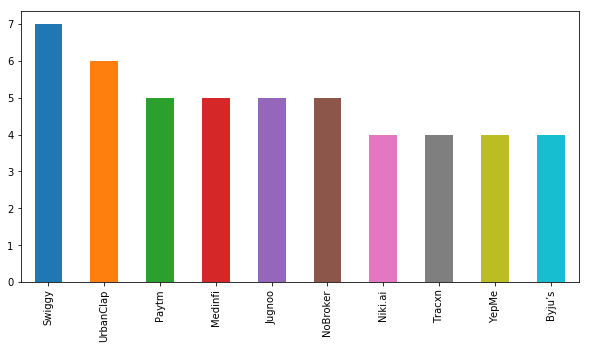

In [10]:

df_startup['StartupName'].value_counts()[:10].plot(kind='bar', figsize=(10,5))
plt.show()

* Swiggy. Ubercap, Jugnoo they are in high demand by Investor.
* Maximum number of times startups got one time investment.

#### ===================================================================================================

### Q3). Top 10 Startups with maximum funding.

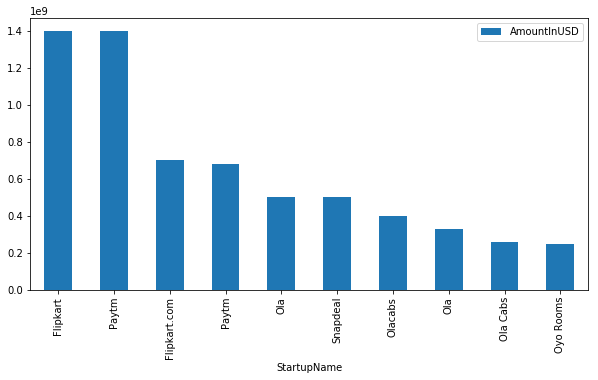

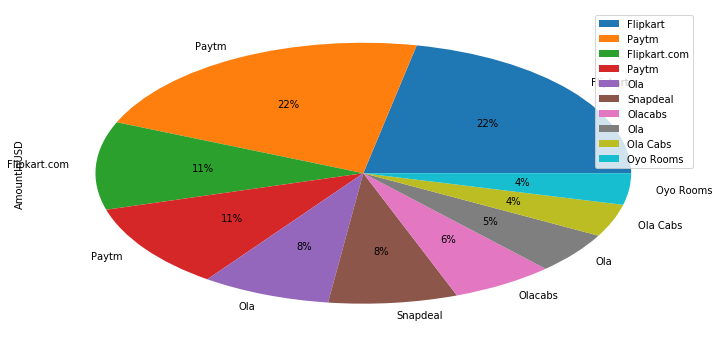

StartupName,Flipkart,Paytm,Flipkart.com,Paytm,Ola,Snapdeal,Olacabs,Ola,Ola Cabs,Oyo Rooms
AmountInUSD,1.400000e+09,1.400000e+09,700000000.0,680000000.0,500000000.0,500000000.0,400000000.0,330000000.0,260000000.0,250000000.0


In [11]:
temp_df = df_startup.sort_values('AmountInUSD', ascending=False, )
temp_df = temp_df[['StartupName', 'AmountInUSD']][:10].set_index('StartupName', drop=True, )
temp_df.plot(kind='bar', figsize=(10,5))
plt.show()

temp_df.plot(kind='pie', subplots=True, figsize=(12,6), autopct='%.f%%')
plt.show()

temp_df.T

#### ====================================================================================================

### Q4). Top 10 Startups with minimum funding.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


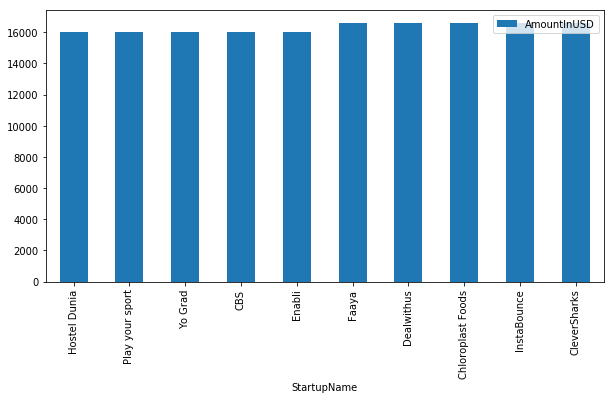

StartupName,Hostel Dunia,Play your sport,Yo Grad,CBS,Enabli,Faaya,Dealwithus,Chloroplast Foods,InstaBounce,CleverSharks
AmountInUSD,16000.0,16000.0,16000.0,16000.0,16000.0,16600.0,16600.0,16600.0,16600.0,16600.0


In [12]:
new_df = df_startup[df_startup['AmountInUSD'].notnull()]
new_df.sort_values('AmountInUSD', inplace=True)
new_df = new_df[['StartupName', 'AmountInUSD']][:10].set_index('StartupName', drop=True)
new_df.plot(kind='bar', figsize=(10,5))
plt.show()
new_df.T

#### ===================================================================================================

# INVESTORS AND INDUSTRIES ANALYSIS

### Q5). Number of Unique Investors.

In [13]:
print(f"The number of unique investors in Indian ecosystem between 2015 to 2017 are\t {df_startup['InvestorsName'].nunique()}")

The number of unique investors in Indian ecosystem between 2015 to 2017 are	 1885


### Q6). Top 10 Investors in Indian ecosystem according to the total amount they invested in startups.

In [14]:
investor = df_startup.groupby('InvestorsName')['AmountInUSD'].sum().reset_index()
investor.sort_values('AmountInUSD', inplace=True, ascending=False)
investor.reset_index()[:10]

,index,InvestorsName,AmountInUSD
0,1520,SoftBank Group,1.462000e+09
1,1012,"Microsoft, eBay, Tencent Holdings",1.400000e+09
2,1553,Steadview Capital and existing investors,7.000000e+08
3,104,"Alibaba Group, Ant Financial",6.800000e+08
4,238,"Baillie Gifford, Falcon Edge Capital, Tiger Gl...",5.000000e+08
5,106,"Alibaba, Foxconn, Softbank",5.000000e+08
6,391,"DST Global, Steadview Capital, Tiger Global, A...",4.000000e+08
7,1521,SoftBank Group Corp,3.300000e+08
8,1388,SIMI Pacific Pte,2.600000e+08
9,1524,"SoftBank Vision Fund, Lightspeed Venture Partn...",2.500000e+08


### ======================================================================================

### Q7). Top 10 industries which are favourite of Investors.

In [15]:
df_startup['IndustryVertical'].value_counts()[:10].reset_index()

,index,IndustryVertical
0,Consumer Internet,772
1,Technology,313
2,eCommerce,171
3,ECommerce,53
4,Healthcare,30
5,Logistics,24
6,Education,20
7,Food & Beverage,19
8,Finance,9
9,Others,6


* Consumer internet and Technology industries are in high demand by Investors.
* Their future is good.
* If one want to start a new startup then they should start in these industries.
* It's good to see education industry in top 10

#### ====================================================================================================

### Q8). Top 10 Sub-industries in Technology industry according to number of times Investors invested in Startups.

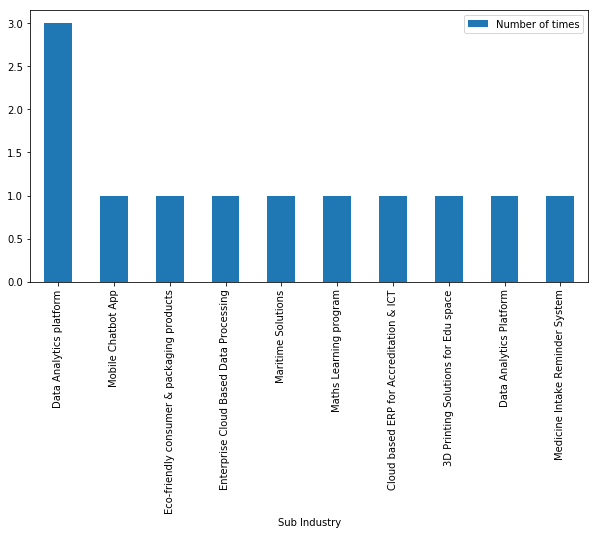

Sub Industry,Data Analytics platform,Mobile Chatbot App,Eco-friendly consumer & packaging products,Enterprise Cloud Based Data Processing,Maritime Solutions,Maths Learning program,Cloud based ERP for Accreditation & ICT,3D Printing Solutions for Edu space,Data Analytics Platform,Medicine Intake Reminder System
Number of times,3,1,1,1,1,1,1,1,1,1


In [16]:
temp_df = df_startup[df_startup['IndustryVertical'].isin(['Technology','technology'])]
temp_df = temp_df['SubVertical'].value_counts()[:10].reset_index()
temp_df.columns = ['Sub Industry', 'Number of times']
temp_df.set_index('Sub Industry', drop=True, inplace=True)
temp_df.plot(kind='bar', figsize=(10,5))
plt.show()
temp_df.T

#### ====================================================================================================

### Q9). Top 10 Industry where funding is maximum.

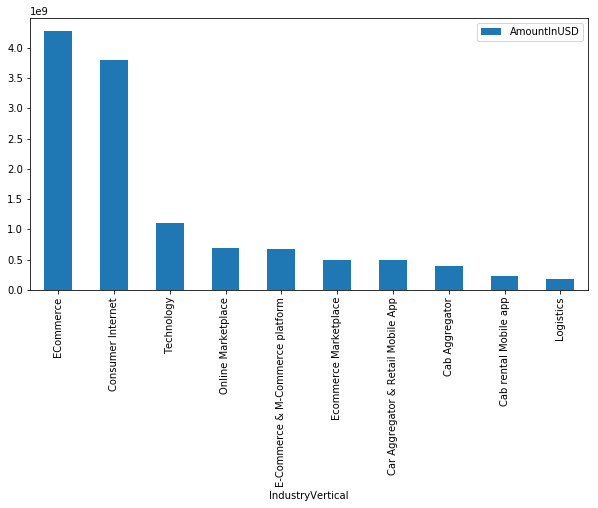

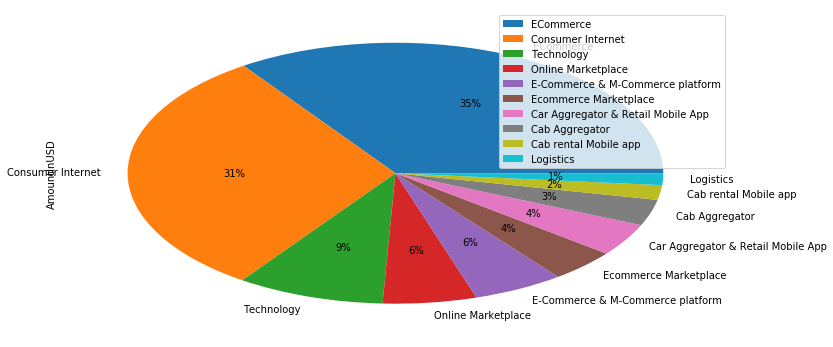

IndustryVertical,ECommerce,Consumer Internet,Technology,Online Marketplace,E-Commerce & M-Commerce platform,Ecommerce Marketplace,Car Aggregator & Retail Mobile App,Cab Aggregator,Cab rental Mobile app,Logistics
AmountInUSD,4.277110e+09,3.797089e+09,1.103594e+09,700000000.0,680000000.0,500000000.0,500000000.0,400000000.0,225000000.0,180645000.0


In [17]:
# converting ecommerce into Ecommerce
df_startup['IndustryVertical'] = df_startup['IndustryVertical'].apply(lambda x: 'ECommerce' if x=='eCommerce' else x)

new_df = df_startup.groupby('IndustryVertical')['AmountInUSD'].sum().reset_index()
new_df.sort_values('AmountInUSD', inplace=True, ascending=False)

new_df.set_index('IndustryVertical', inplace=True, drop=True)
new_df[:10].plot(kind='bar', figsize=(10,5))
plt.show()

new_df[:10].plot(kind='pie', subplots=True, figsize=(12,6), autopct='%.f%%')
plt.show()

new_df[:10].T

* ECommerce got maximum amount of funding followed by Consumer Internet and then by Technology.
* If one want to start a startup then they can start in these industries.

#### ==================================================================================================

# CITIES ANALYSIS

### Q10). Top 10 cities which have maximum startups.

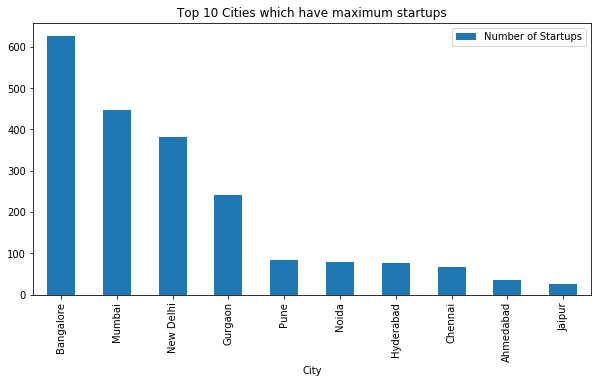

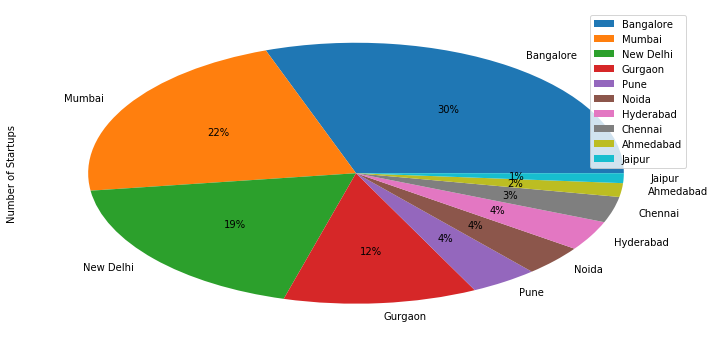

City,Bangalore,Mumbai,New Delhi,Gurgaon,Pune,Noida,Hyderabad,Chennai,Ahmedabad,Jaipur
Number of Startups,627,446,381,240,84,78,76,66,35,25


In [18]:
city = df_startup['CityLocation'].value_counts()[:10].reset_index()
city.columns = ['City', 'Number of Startups']
city.set_index('City', drop=True, inplace=True)
city.plot(kind='bar', figsize=(10,5), title='Top 10 Cities which have maximum startups')
plt.show()

city.plot(kind='pie', subplots=True, figsize=(12,6), autopct='%.f%%')
plt.show()
city.T


* Bangalore,the silicon valley of India, is on top followed by Mumbai and then by Delhi.
* Jaipur is also in top 10 with 25 startups. A good start from Jaipur. 
* Jaipur can be a hub of startups as there is huge space avilable in Jaipur and government is also come out with new schemes.

#### ====================================================================================================

### Q11). Top 10 cities which got maximum funding and their funding distribution.

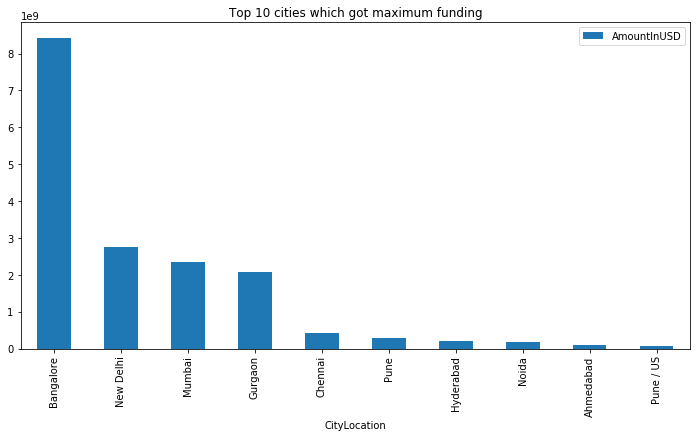

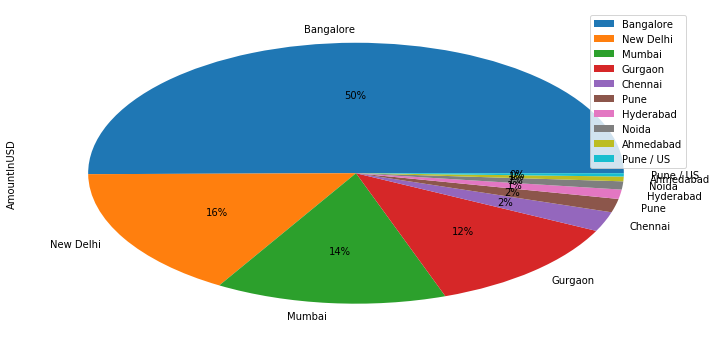

CityLocation,Bangalore,New Delhi,Mumbai,Gurgaon,Chennai,Pune,Hyderabad,Noida,Ahmedabad,Pune / US
AmountInUSD,8.425674e+09,2.750248e+09,2.343694e+09,2.067822e+09,411105000.0,282153000.0,194762000.0,170338000.0,98186000.0,68500000.0


In [19]:
# Dealing with duplicates name.
l = ['Bangalore', 'Bangalore/ Bangkok', 'SFO / Bangalore','Seattle / Bangalore', 'Bangalore / SFO',
     'Bangalore / Palo Alto', 'Bangalore / San Mateo', 'Bangalore / USA',   ]
df_startup['CityLocation'] = df_startup['CityLocation'].apply(lambda x: 'Bangalore' if x in l else x )

city_df = df_startup.groupby('CityLocation')['AmountInUSD'].sum().reset_index()
city_df.sort_values('AmountInUSD', ascending=False, inplace=True)
city_df = city_df[:10]
city_df.reset_index(inplace=True, drop=True)
city_df.set_index('CityLocation', inplace=True, drop=True)
city_df.plot(kind='bar', figsize=(12,6), title='Top 10 cities which got maximum funding')
plt.show()

city_df.plot(kind='pie', figsize=(12,6), autopct='%.f%%', subplots=True)
plt.show()

city_df.T

* 50% of funding was done in Bangalore city.
* Mumbai have so many startups but have less funding.


#### Let's check out their distribution.

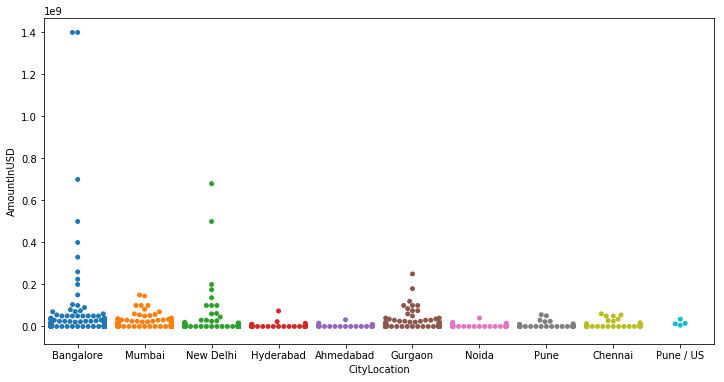

In [20]:
# top_city is the cities which have maximum funding.
top_city = city_df.index
temp_df = df_startup[df_startup['CityLocation'].isin(top_city)]
temp_df = temp_df[['CityLocation', 'AmountInUSD']]

plt.figure(figsize=(12,6))
sns.swarmplot(data=temp_df, x=temp_df['CityLocation'], y=temp_df['AmountInUSD'])

plt.show()

* As one can see there are so many outliers in Bangalore and in New Delhi.

#### =====================================================================================================

# FUND ANALYSIS

### Q12). Funding distribution in Indian Startups over Years.

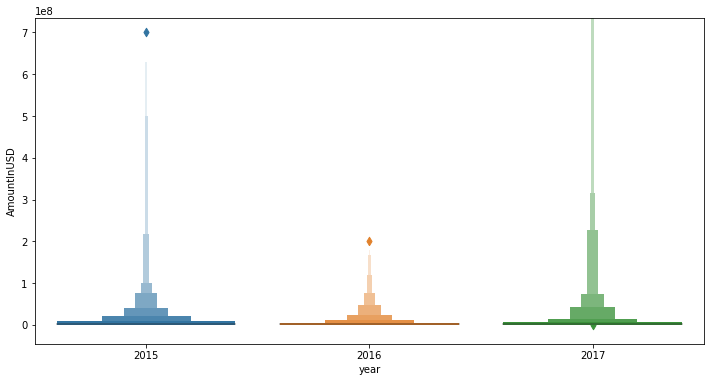

In [38]:
# Converting some Dates into its proper format, as they were entered wrong.
def convert(x):
    if x=='12/05.2015':
        return '12/05/2015'
    elif x=='13/04.2015':
        return '13/04/2015'
    elif x=='15/01.2015':
        return '15/01/2015'
    elif x=='22/01//2015':
        return '22/01/2015'
    else:
        return x

df_startup['Date'] = df_startup['Date'].apply(convert)

# Need to convert string into datetime format object.
df_startup['year'] = (pd.to_datetime(df_startup['Date']).dt.year)
df_startup.head()

plt.figure(figsize=(12,6))
sns.boxenplot(data=df_startup, x='year', y='AmountInUSD')
plt.show()

* There is no outliers in 2016 as compare to 2015 and 2017.
* In 2017 we are getting left skewness , means many large amounts were invested in 2017.

#### ====================================================================================================

### Q13). Number of startups over months and over years.

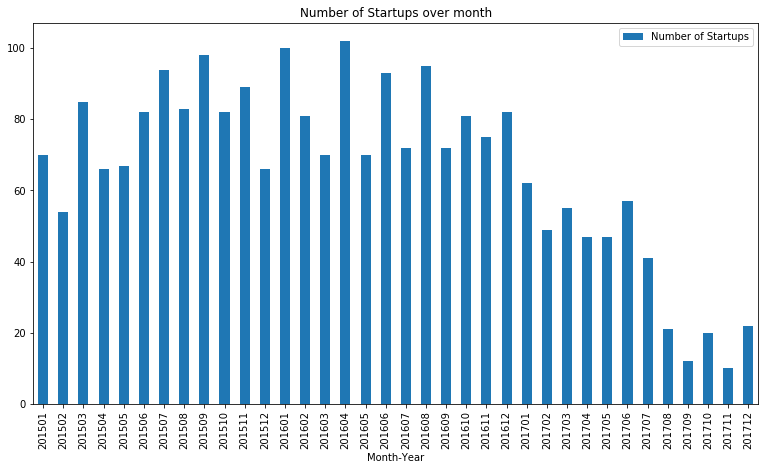

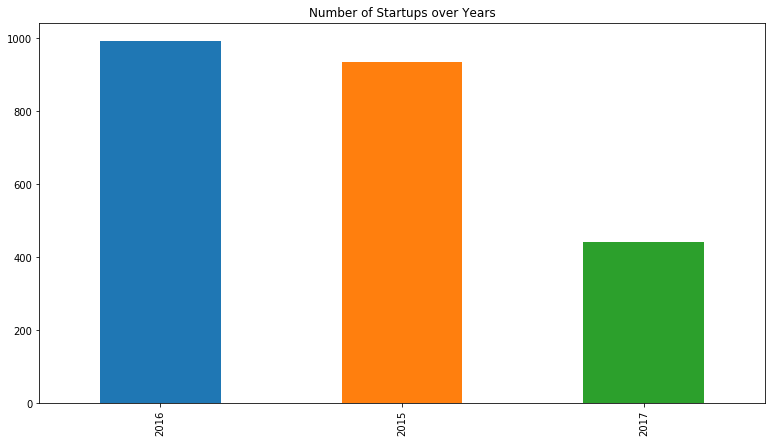

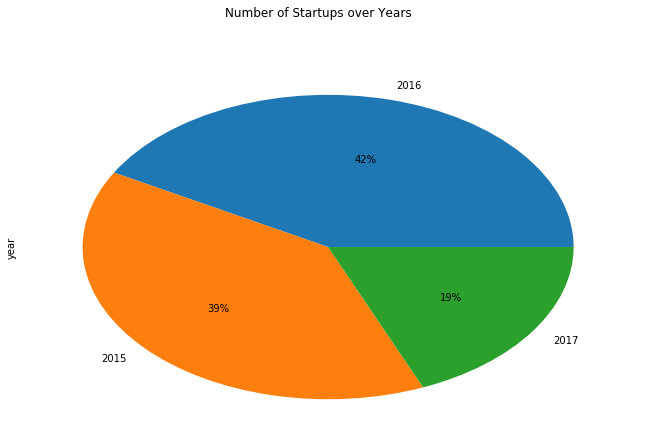

In [76]:
# New column with date in year-month format.

df_startup['year_month'] = (pd.to_datetime(df_startup['Date']).dt.year*100) + (pd.to_datetime(df_startup['Date']).dt.month)

times = df_startup['year_month'].value_counts().reset_index()
times.set_index('index', drop=True, inplace=True)
times.index.name = 'Month-Year'
times.columns = ['Number of Startups']
times.sort_index(inplace=True)
times.plot(kind='bar', figsize=(13,7), title='Number of Startups over month')
plt.show()

# Let's see number of startups over Years
df_startup['year'].value_counts().plot(kind='bar', figsize=(13,7), title='Number of Startups over Years')
plt.show()
df_startup['year'].value_counts().plot(kind='pie', figsize=(11,7), title='Number of Startups over Years', subplots=True, autopct='%.f%%')
plt.show()

* The trend in startups first incres in 2016 and then decrease in 2017.


#### ====================================================================================================

### Q14). Different type of funding (Investment type).

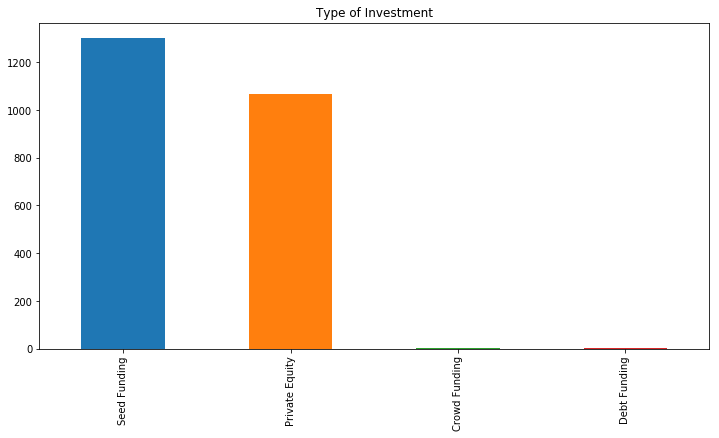

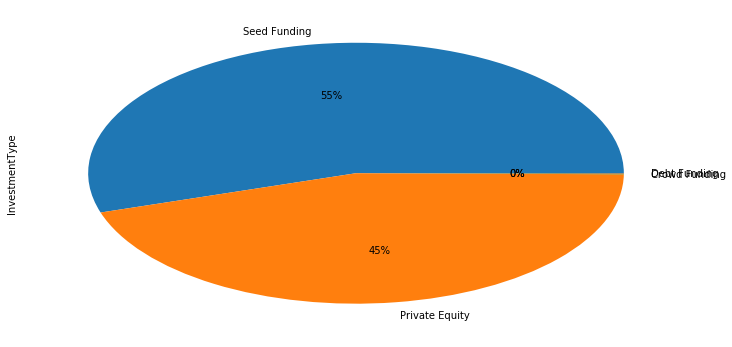

In [83]:
# Dealing with incorrect entries.
def convert(x):
    if x== 'SeedFunding':
        return 'Seed Funding'
    elif x== 'PrivateEquity':
        return 'Private Equity'
    elif x== 'Crowd funding':
        return 'Crowd Funding'
    else:
        return x

df_startup['InvestmentType'] = df_startup['InvestmentType'].apply(convert)

df_startup['InvestmentType'].value_counts().plot(kind='bar', figsize=(12,6), title='Type of Investment')
plt.show()

df_startup['InvestmentType'].value_counts().plot(kind='pie', figsize=(12,6), subplots=True, autopct='%.f%%')
plt.show()

#### ===================================================================================================
#### ===================================================================================================
